## ICPR 2024 Competition on Multilingual Claim-Span Identification

### Installing Dependencies

In [ ]:
!pip install emoji
!pip install contractions
!pip install langdetect
!pip install indic-nlp-library

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import contractions
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Datasets

In [ ]:
# Training English and Hindi datasets
train_en = pd.read_json("/content/drive/MyDrive/Multilingual Datasets/Clean Data/train_en_encoded_clean.json")
train_hi = pd.read_json("/content/drive/MyDrive/Multilingual Datasets/Clean Data/train_hi_encoded_clean.json")

train_en_hi = pd.read_json("/content/drive/MyDrive/Multilingual Datasets/Clean Data/training_en_hi_encoded_clean.json")

### Adding Encoded column for claims that can bring interactive visualizations

In [ ]:
#Adding Encoded for English Data

not_claim = "not_claim"
claim = "claim"

def map_claim_label(value):
    if value == "1":
        return claim
    elif value == "0":
        return not_claim
    else:
        return value  # Return the same value if it's neither "0" nor "1"

train_en["labels"] = train_en['claims'].astype(str).apply(map_claim_label)
train_en.head()

,claims,text_tokens,labels
0,0,#vaers 17y #pfizer #covidvaccine #suicide atte...,not_claim
1,1,weve truly come a long way from december and j...,claim
2,1,fuck that its not faux outrage inject them wit...,claim
3,1,@u55750420 which makes no sense the vaccine ca...,claim
4,1,fact or fiction you decide the upcoming corona...,claim


In [ ]:
#Adding Encoded for English and Hindi Data

not_claim = "not_claim"
claim = "claim"

def map_claim_label(value):
    if value == "1":
        return claim
    elif value == "0":
        return not_claim
    else:
        return value  # Return the same value if it's neither "0" nor "1"

train_hi["labels"] = train_hi['claims'].astype(str).apply(map_claim_label)
train_hi.head()

,claims,text_tokens,labels
0,0,भाइयों इसको प्रशासन कहे कि कुशासन कहें कि दुशा...,not_claim
1,1,मौसम विभाग के मुताबिक अगले 24 घंटे में पश्चिम ...,claim
2,1,योगी सरकार मे 50 लाख अधिक बच्चे स्कूल पहुंचे 9...,claim
3,0,@ U45195860 @ U84700880 तुमलोग कितने भी पढ़ लि...,not_claim
4,1,दिल्ली का एक नमूना उत्तर प्रदेश आता है और कहता...,claim


In [ ]:
#Adding Encoded for English and Hindi Data

not_claim = "not_claim"
claim = "claim"

def map_claim_label(value):
    if value == "1":
        return claim
    elif value == "0":
        return not_claim
    else:
        return value  # Return the same value if it's neither "0" nor "1"

train_en_hi["labels"] = train_en_hi['claims'].astype(str).apply(map_claim_label)
train_en_hi.head()

,claims,text_tokens,labels
0,0,#vaers 17y #pfizer #covidvaccine #suicide atte...,not_claim
1,1,weve truly come a long way from december and j...,claim
2,1,fuck that its not faux outrage inject them wit...,claim
3,1,@u55750420 which makes no sense the vaccine ca...,claim
4,1,fact or fiction you decide the upcoming corona...,claim


#### Tweets Label Counts

__Training English Labels Count__

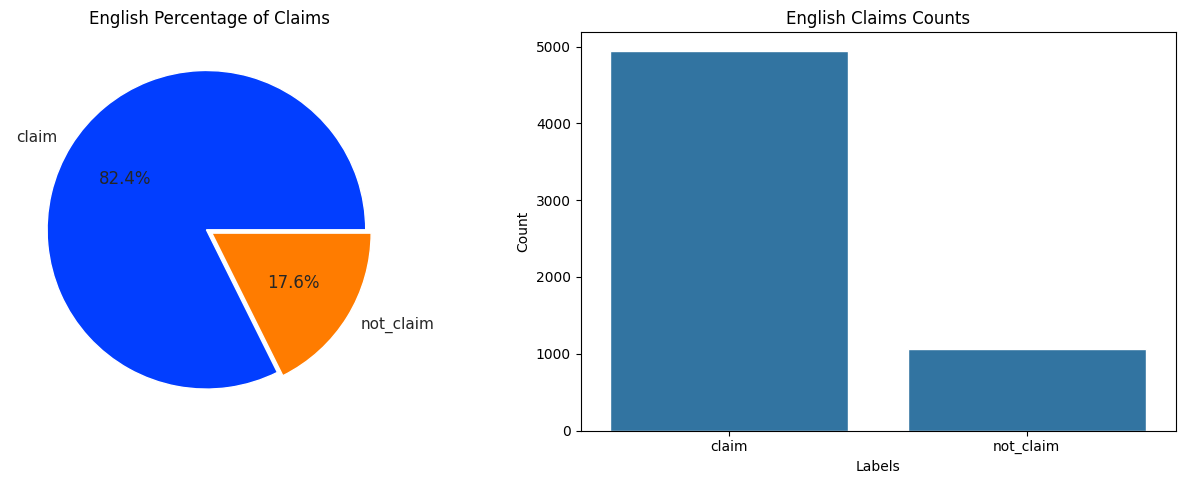

In [ ]:
# Training English Labels Count
train_en_label_count = train_en['labels'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# Set Visualization
sns.set_theme(style='darkgrid', palette='bright')
color = sns.color_palette(palette='bright')
explode = [0.02] * len(train_en_label_count)

# Pie chart
axes[0].pie(train_en_label_count.values, labels=train_en_label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('English Percentage of Claims')

# Bar chart
sns.barplot(x=train_en_label_count.index, y=train_en_label_count.values, ax=axes[1])
axes[1].set_title('English Claims Counts')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Count')

# Show
plt.tight_layout()
plt.show()

__Training Hindi Labels Count__

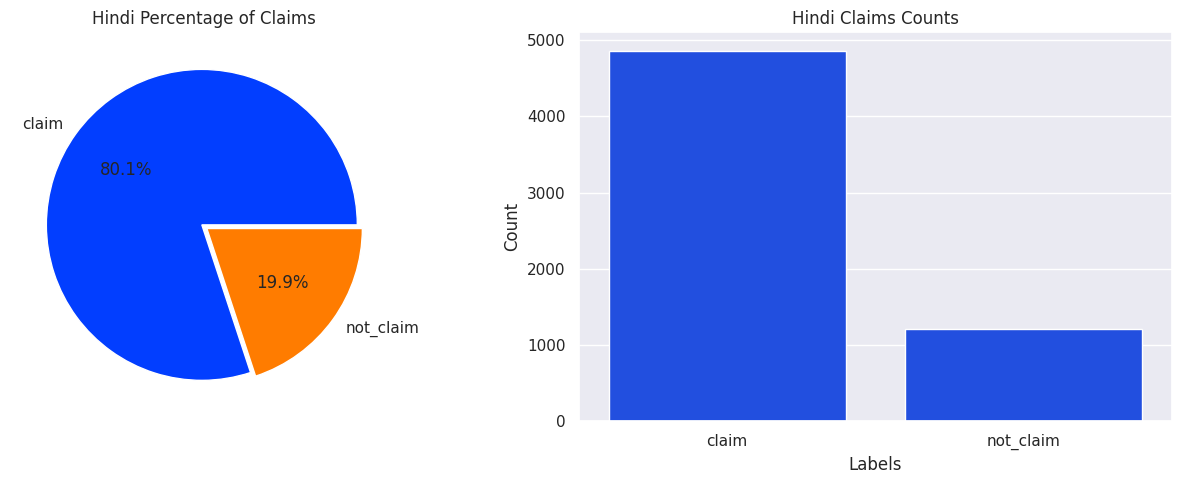

In [ ]:
# Training English Labels Count
train_hi_label_count = train_hi['labels'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# Set Visualization
sns.set_theme(style='darkgrid', palette='bright')
color = sns.color_palette(palette='bright')
explode = [0.02] * len(train_hi_label_count)

# Pie chart
axes[0].pie(train_hi_label_count.values, labels=train_hi_label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Hindi Percentage of Claims')

# Bar chart
sns.barplot(x=train_hi_label_count.index, y=train_hi_label_count.values, ax=axes[1])
axes[1].set_title('Hindi Claims Counts')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Count')

# Show
plt.tight_layout()
plt.show()

__Training English and Hindi Labels Count__

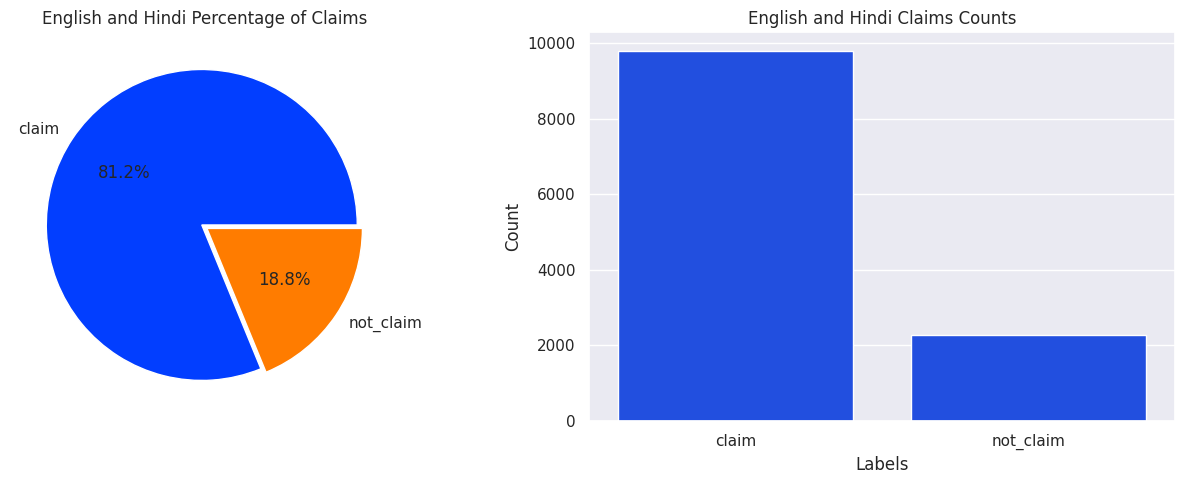

In [ ]:
# Training English Labels Count
train_en_hi_label_count = train_en_hi['labels'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# Set Visualization
sns.set_theme(style='darkgrid', palette='bright')
color = sns.color_palette(palette='bright')
explode = [0.02] * len(train_en_hi_label_count)

# Pie chart
axes[0].pie(train_en_hi_label_count.values, labels=train_en_hi_label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('English and Hindi Percentage of Claims')

# Bar chart
sns.barplot(x=train_en_hi_label_count.index, y=train_en_hi_label_count.values, ax=axes[1])
axes[1].set_title('English and Hindi Claims Counts')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Count')

# Show
plt.tight_layout()
plt.show()

__Let's examine the distribution of tokens length for English and Hindi dataset.__

Text(0.5, 1.0, 'English Tokens Length')

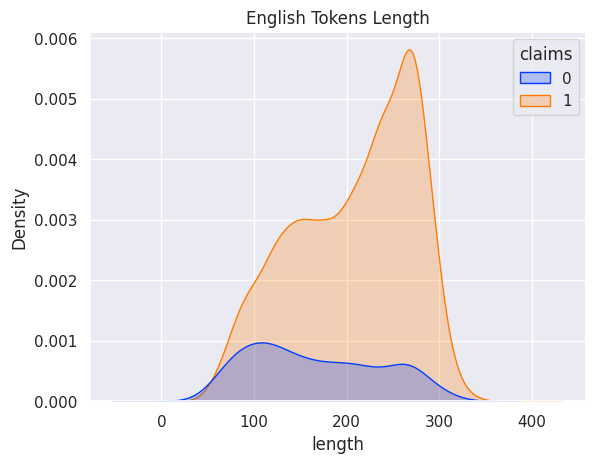

In [ ]:
train_en['length'] = train_en['text_tokens'].apply(len)

# Plot Distribution length words
sns.kdeplot(train_en, x=train_en['length'],hue='claims', fill=True)

plt.title("English Tokens Length")

Text(0.5, 1.0, 'Hindi Tokens Length')

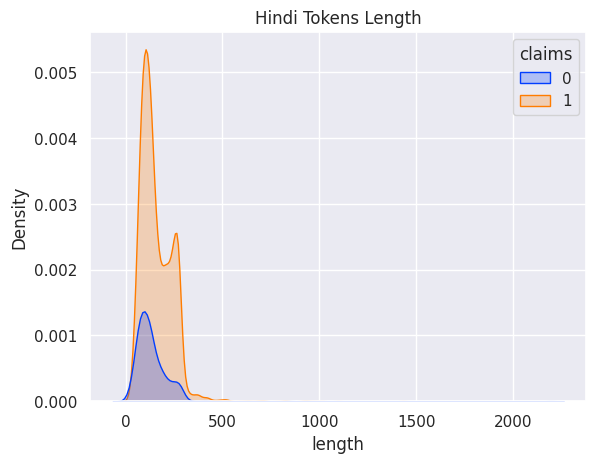

In [ ]:
train_hi['length'] = train_hi['text_tokens'].apply(len)

# Plot Distribution length words
sns.kdeplot(train_hi, x=train_hi['length'],hue='claims', fill=True)

plt.title("Hindi Tokens Length")

Text(0.5, 1.0, 'English and Hindi Tokens Length')

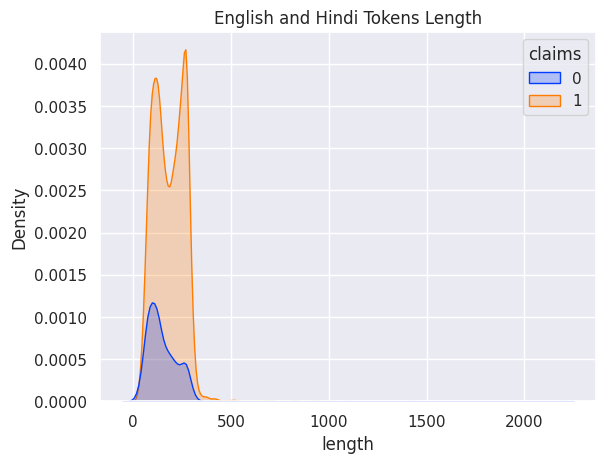

In [ ]:
train_en_hi['length'] = train_en_hi['text_tokens'].apply(len)

# Plot Distribution length words
sns.kdeplot(train_en_hi, x=train_en_hi['length'],hue='claims', fill=True)

plt.title("English and Hindi Tokens Length")

__The distribution of tokens lengths in the dataset.__

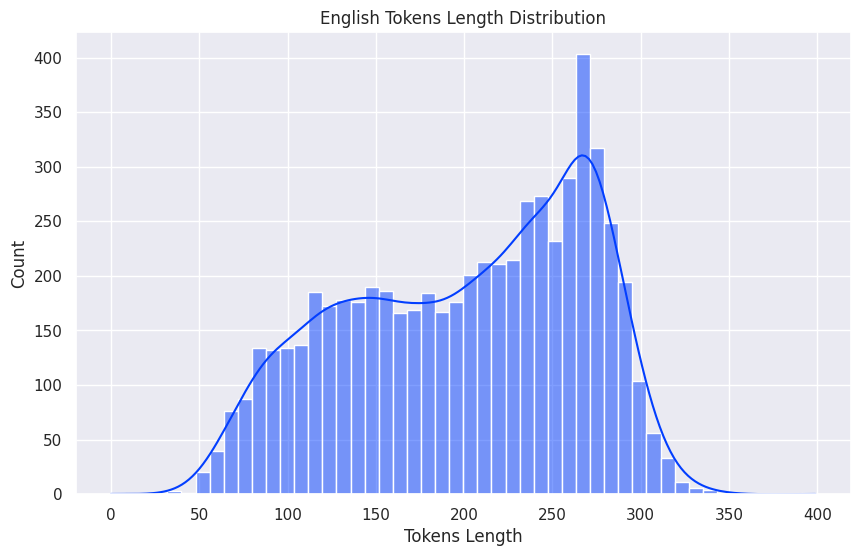

In [ ]:
# Calculate tokens lengths

# Plot tokens length distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_en['length'], bins=50, kde=True)

plt.title('English Tokens Length Distribution')
plt.xlabel('Tokens Length')
plt.ylabel('Count')
plt.show()

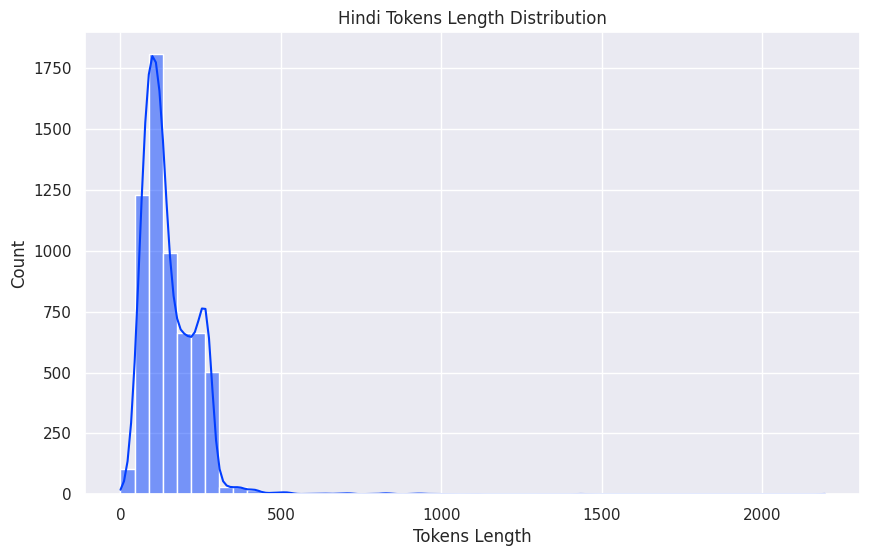

In [ ]:
# Calculate tokens lengths

# Plot tokens length distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_hi['length'], bins=50, kde=True)

plt.title('Hindi Tokens Length Distribution')
plt.xlabel('Tokens Length')
plt.ylabel('Count')
plt.show()

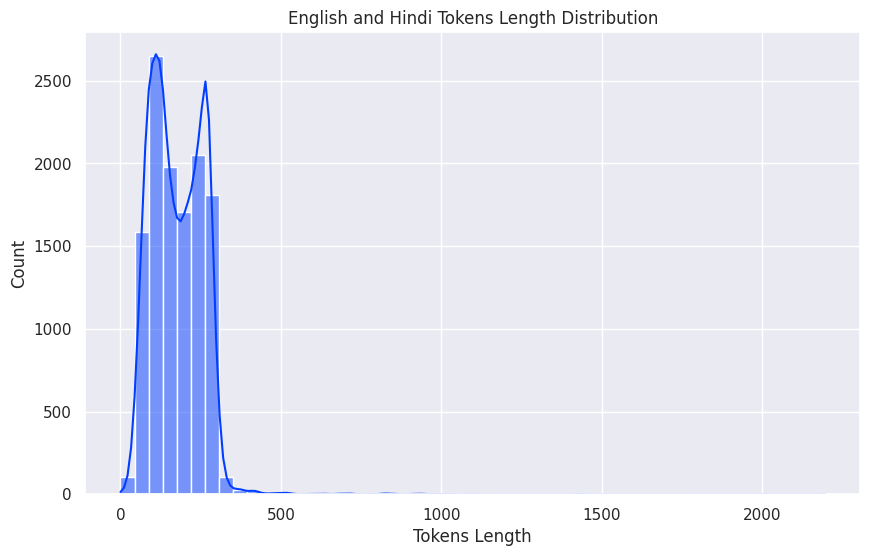

In [ ]:
# Calculate tokens lengths

# Plot tokens length distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_en_hi['length'], bins=50, kde=True)

plt.title('English and Hindi Tokens Length Distribution')
plt.xlabel('Tokens Length')
plt.ylabel('Count')
plt.show()

__Let's analyze the text data by looking at the most common words and word frequencies.__

Training English data

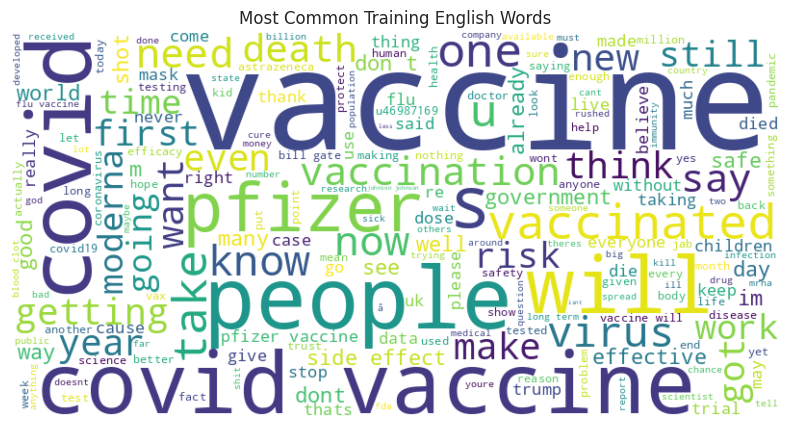

In [ ]:
# Generate a word cloud of the tokens data
text = ' '.join(train_en['text_tokens'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Training English Words')
plt.show()

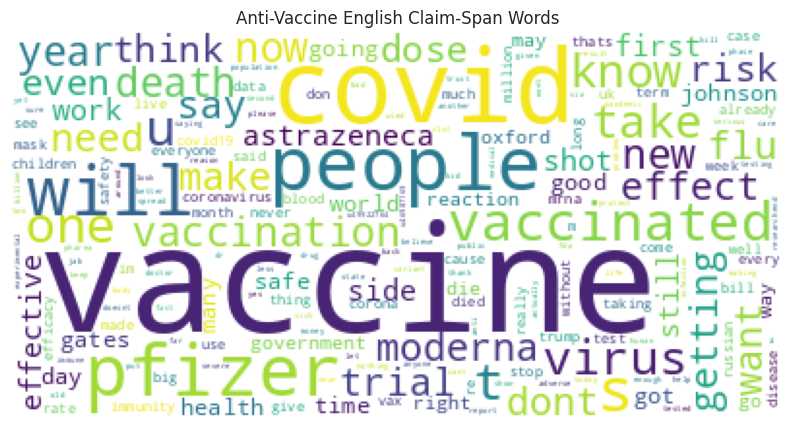

In [ ]:
def create_cloud(data, title):
    fig, axs = plt.subplots(figsize=(10, 8))
    text = train_en[train_en["labels"] == data]
    text_cloud = " ".join(txt for txt in text["text_tokens"])
    cloud = WordCloud(collocations=False, background_color='white').generate(text_cloud)
    axs.imshow(cloud)
    axs.axis('off')
    axs.set_title(title)
    plt.show()  # Display the plot

create_cloud('claim', 'Anti-Vaccine English Claim-Span Words')

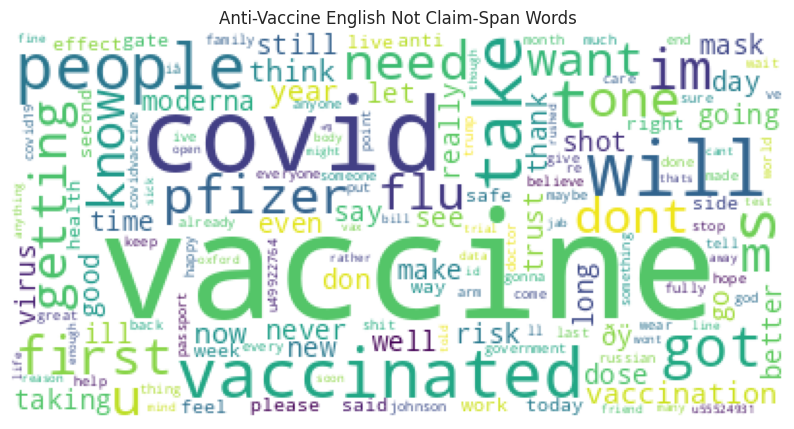

In [ ]:
def create_cloud(data, title):
    fig, axs = plt.subplots(figsize=(10, 8))
    text = train_en[train_en["labels"] == data]
    text_cloud = " ".join(txt for txt in text["text_tokens"])
    cloud = WordCloud(collocations=False, background_color='white').generate(text_cloud)
    axs.imshow(cloud)
    axs.axis('off')
    axs.set_title(title)
    plt.show()  # Display the plot

create_cloud('not_claim', 'Anti-Vaccine English Not Claim-Span Words')

Training Hindi Data

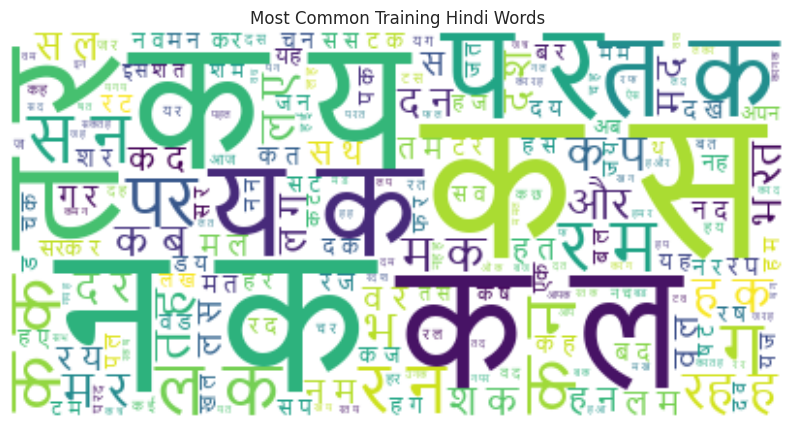

In [ ]:
# Assuming train_hi['text_tokens'] is a list of Hindi text tokens
text = ' '.join(train_hi['text_tokens'])

# Path to a font that supports Hindi characters, e.g., a commonly used Devanagari font
font_path = '/content/drive/MyDrive/Multilingual Datasets/Hindi Fonts/Nirmala.ttf'

# Generate word cloud
wordcloud = WordCloud(font_path=font_path, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Training Hindi Words')
plt.show()

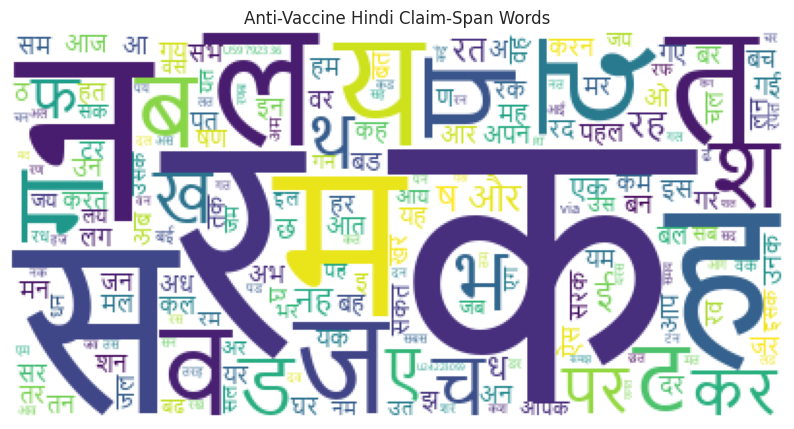

In [ ]:
def create_cloud(data, title):
    fig, axs = plt.subplots(figsize=(10, 8))
    text = train_hi[train_hi["labels"] == data]
    text_cloud = " ".join(txt for txt in text["text_tokens"])

    # Path to a font that supports Hindi characters, e.g., a commonly used Devanagari font
    font_path = '/content/drive/MyDrive/Multilingual Datasets/Hindi Fonts/Nirmala.ttf'

    cloud = WordCloud(font_path=font_path, collocations=False, background_color='white').generate(text_cloud)

    axs.imshow(cloud)
    axs.axis('off')
    axs.set_title(title)
    plt.show()  # Display the plot

create_cloud('claim', 'Anti-Vaccine Hindi Claim-Span Words')

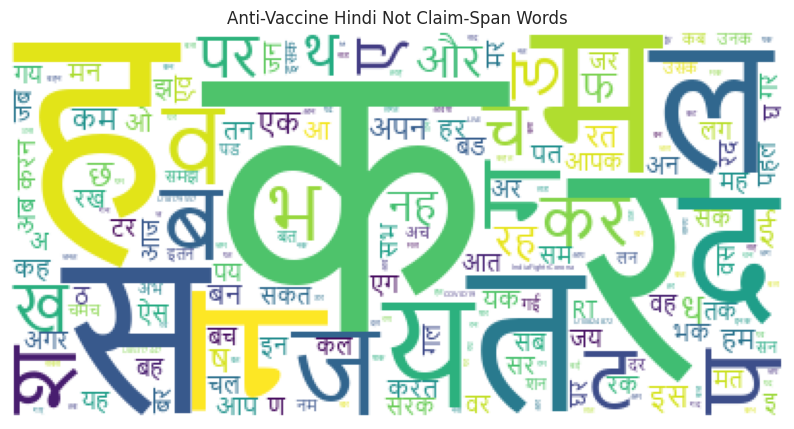

In [ ]:
def create_cloud(data, title):
    fig, axs = plt.subplots(figsize=(10, 8))
    text = train_hi[train_hi["labels"] == data]
    text_cloud = " ".join(txt for txt in text["text_tokens"])

    # Path to a font that supports Hindi characters, e.g., a commonly used Devanagari font
    font_path = '/content/drive/MyDrive/Multilingual Datasets/Hindi Fonts/Nirmala.ttf'

    cloud = WordCloud(font_path=font_path, collocations=False, background_color='white').generate(text_cloud)

    axs.imshow(cloud)
    axs.axis('off')
    axs.set_title(title)
    plt.show()  # Display the plot

create_cloud('not_claim', 'Anti-Vaccine Hindi Not Claim-Span Words')

Training English and Hindi Data

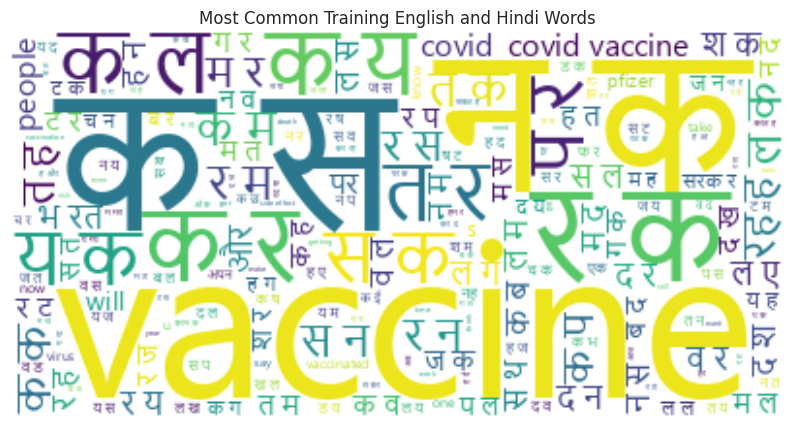

In [ ]:
text = ' '.join(train_en_hi['text_tokens'])

# Path to a font that supports Hindi characters, e.g., a commonly used Devanagari font
font_path = '/content/drive/MyDrive/Multilingual Datasets/Hindi Fonts/Nirmala.ttf'

# Generate word cloud
wordcloud = WordCloud(font_path=font_path, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Training English and Hindi Words')
plt.show()

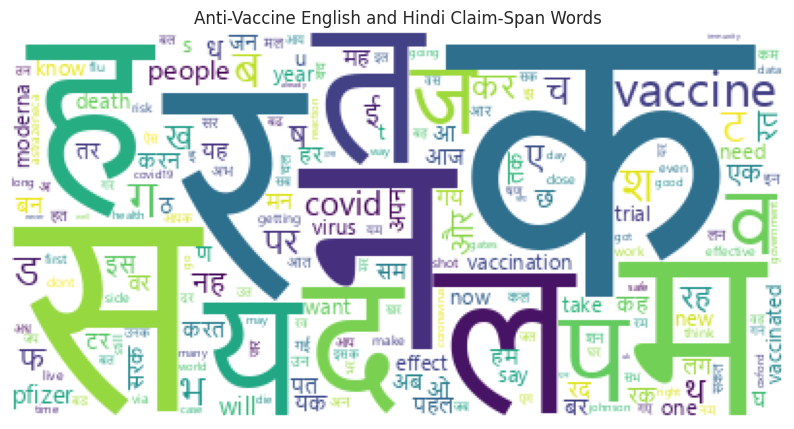

In [ ]:
def create_cloud(data, title):
    fig, axs = plt.subplots(figsize=(10, 8))
    text = train_en_hi[train_en_hi["labels"] == data]
    text_cloud = " ".join(txt for txt in text["text_tokens"])

    # Path to a font that supports Hindi characters, e.g., a commonly used Devanagari font
    font_path = '/content/drive/MyDrive/Multilingual Datasets/Hindi Fonts/Nirmala.ttf'

    cloud = WordCloud(font_path=font_path, collocations=False, background_color='white').generate(text_cloud)

    axs.imshow(cloud)
    axs.axis('off')
    axs.set_title(title)
    plt.show()  # Display the plot

create_cloud('claim', 'Anti-Vaccine English and Hindi Claim-Span Words')

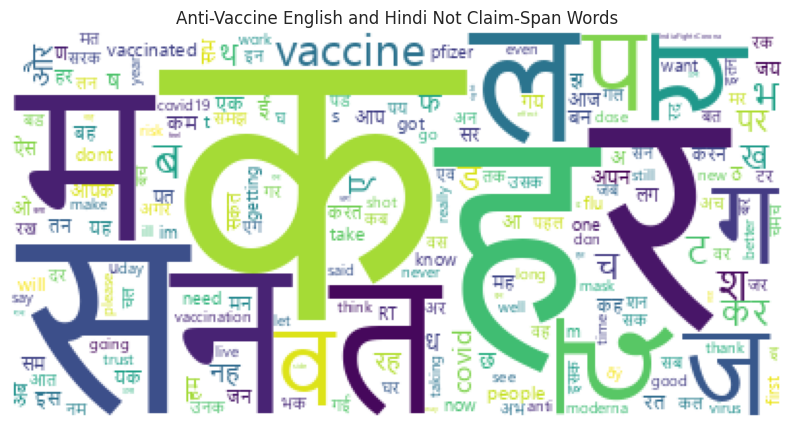

In [ ]:
def create_cloud(data, title):
    fig, axs = plt.subplots(figsize=(10, 8))
    text = train_en_hi[train_en_hi["labels"] == data]
    text_cloud = " ".join(txt for txt in text["text_tokens"])

    # Path to a font that supports Hindi characters, e.g., a commonly used Devanagari font
    font_path = '/content/drive/MyDrive/Multilingual Datasets/Hindi Fonts/Nirmala.ttf'

    cloud = WordCloud(font_path=font_path, collocations=False, background_color='white').generate(text_cloud)

    axs.imshow(cloud)
    axs.axis('off')
    axs.set_title(title)
    plt.show()  # Display the plot

create_cloud('not_claim', 'Anti-Vaccine English and Hindi Not Claim-Span Words')

### Splitting data based on Claims for Data Exploration.

In [ ]:
# Tokenization
train_en_hi['tweet_list'] = train_en_hi['text_tokens'].apply(word_tokenize)

claim_type = train_en_hi[train_en_hi['labels']=='claim']
not_claim_type = train_en_hi[train_en_hi['labels']=='not_claim']


train_en_hi.head()

,claims,text_tokens,labels,length,tweet_list
0,0,#vaers 17y #pfizer #covidvaccine #suicide atte...,not_claim,242,"[#, vaers, 17y, #, pfizer, #, covidvaccine, #,..."
1,1,weve truly come a long way from december and j...,claim,262,"[weve, truly, come, a, long, way, from, decemb..."
2,1,fuck that its not faux outrage inject them wit...,claim,68,"[fuck, that, its, not, faux, outrage, inject, ..."
3,1,@u55750420 which makes no sense the vaccine ca...,claim,203,"[@, u55750420, which, makes, no, sense, the, v..."
4,1,fact or fiction you decide the upcoming corona...,claim,278,"[fact, or, fiction, you, decide, the, upcoming..."


In [ ]:
# This fuctions shows top 5 words of Claim Spans Identifications

def generate_top_words_dataframe(tweet_data, title):

    word_counter = Counter([item for sublist in tweet_data['tweet_list'] for item in sublist])
    top_words_df = pd.DataFrame(word_counter.most_common(10), columns=['Top Words', 'Count'])
    styled_df = top_words_df.style.set_caption(title).background_gradient(cmap='Greens')

    return styled_df

In [ ]:
generate_top_words_dataframe(claim_type, "Top 10 Anti-Vaccine Claims Words")

,Top Words,Count
0,@,8737
1,the,7336
2,#,5535
3,के,5184
4,vaccine,4800
5,to,4246
6,है,3961
7,में,3932
8,की,3887
9,a,3512


In [ ]:
generate_top_words_dataframe(not_claim_type, "Top 10 Anti-Vaccine Not Claims Words")

,Top Words,Count
0,@,2230
1,the,1215
2,#,1087
3,है,902
4,vaccine,877
5,के,857
6,i,853
7,to,823
8,a,699
9,की,628


In [ ]:
# Dropping columns

columns_to_drop = ['length', 'tweet_list']
train_en_hi = train_en_hi.drop(columns=columns_to_drop)

train_en_hi.head()

,claims,text_tokens,labels
0,0,#vaers 17y #pfizer #covidvaccine #suicide atte...,not_claim
1,1,weve truly come a long way from december and j...,claim
2,1,fuck that its not faux outrage inject them wit...,claim
3,1,@u55750420 which makes no sense the vaccine ca...,claim
4,1,fact or fiction you decide the upcoming corona...,claim


In [ ]:
# Saving DataFrame to a JSON file
train_en_hi.to_json('train_en_hi_encoded_labels.json', orient='records')

In [ ]:
val_en_hi = pd.read_json("/content/drive/MyDrive/Multilingual Datasets/Clean Data/validation_en_hi_encoded_clean.json")
val_en_hi.head()

,claims,text_tokens
0,1,listen people the vaccines work they work that...
1,0,i ll take the covid vaccine in 5 years after a...
2,0,@u72240666 hearing that the pope says refusing...
3,1,trump has got the new russian vaccine and he c...
4,1,@u41390182 @u31519664 gotta agree we already i...


In [ ]:
#Adding Encoded for Validation English and Hindi Data

not_claim = "not_claim"
claim = "claim"

def map_claim_label(value):
    if value == "1":
        return claim
    elif value == "0":
        return not_claim
    else:
        return value  # Return the same value if it's neither "0" nor "1"

val_en_hi["labels"] = val_en_hi['claims'].astype(str).apply(map_claim_label)
val_en_hi.head()

,claims,text_tokens,labels
0,1,listen people the vaccines work they work that...,claim
1,0,i ll take the covid vaccine in 5 years after a...,not_claim
2,0,@u72240666 hearing that the pope says refusing...,not_claim
3,1,trump has got the new russian vaccine and he c...,claim
4,1,@u41390182 @u31519664 gotta agree we already i...,claim


In [ ]:
# Saving DataFrame to a JSON file
val_en_hi.to_json('val_en_hi_encoded_labels.json', orient='records')